### Construction of B-Spline Basis Functions

B-Spline Basis Functions are a computationally efficient and equivalent representation of continous piecewise polynomials, commonly known as Splines. These are defined recursively as

$$B_{i,0}(x) = \begin{cases} 1 & \text{if } x_i \leq x < x_{i+1} \\ 0 & \text{otherwise} \end{cases}$$

$$B_{i,k}(x) = \frac{x-x_i}{x_{i+k}-x_i}B_{i,k-1}(x) + \frac{x_{i+k+1}-x}{x_{i+k+1}-x_{i+1}}B_{i+1,k-1}(x)$$

where $x_i$ and $x_{i+1}$ are the knots of the spline. The $B_{i,k}$ are called B-Spline Basis Functions of degree $k$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from b_spline_basis import B_Spline_Basis
from regression_spline_estimator import Regression_Spline_Estimator

### Let's generate some data and equally spaced knots

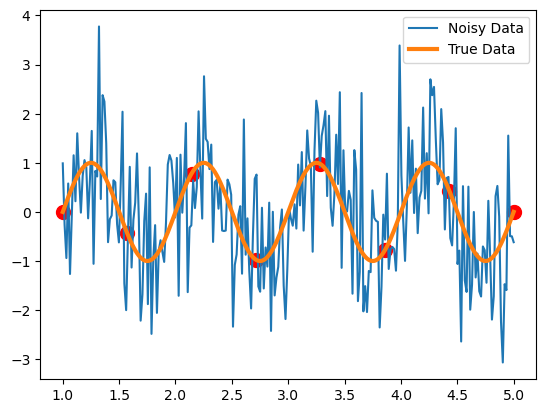

In [2]:
x=np.linspace(1,5,250)
y=np.sin(2*np.pi*x)
noisy=y+np.random.normal(0,1,250)
gamma=np.linspace(1,5,8)
plt.plot(x,noisy, label='Noisy Data')
plt.plot(x,y, label='True Data',lw=3)
plt.legend()

plt.scatter(gamma,np.sin(2*np.pi*gamma), label='Design Points',s=100,color='red')

In [3]:
print(f"Knots = {gamma}")

Knots = [1.         1.57142857 2.14285714 2.71428571 3.28571429 3.85714286
 4.42857143 5.        ]


### Initiate an instance of B-Spline Basis Functions

Here the B-spline basis functions are callable given a set of design points. The basis functions are evaluated at the design points and the resulting matrix is returned which is shape N x (K+M)

In [4]:
basis=B_Spline_Basis(x,gamma,order=3)

In [5]:
eval_basis=basis.B(x)
eval_basis.shape

(250, 12)

### Visualize the density of our matrix

In general this design matrix is of the size N x (K+M) where N is the number of observations, K is the size of the knot vector and M is the degree of the spline. 

The number of columns is the number of basis functions. The number of rows is the number of observations. 

In the case of smoothing splines; this simplifies to N x (N+4)

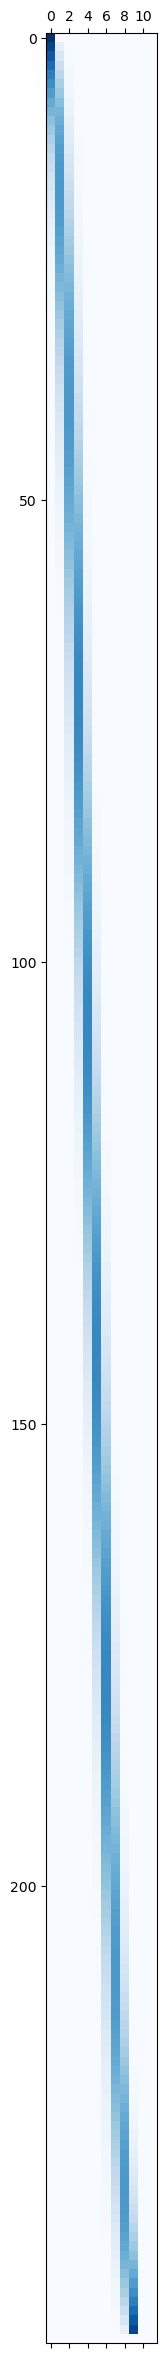

In [6]:
fig,ax=plt.subplots(1,1,figsize=(12,30))

ax.matshow(eval_basis, cmap=plt.cm.Blues)

Note the above is a banded matrix which we can take advantage of when inverting. Applying the cholesky decomposition to the matrix is computationally efficient. We can then solve for the remaining linear system

In [7]:
regularized_basis=eval_basis.T@eval_basis+np.eye(eval_basis.shape[1])*0.01

L=np.linalg.cholesky(regularized_basis)
LT=L.T

beta=np.linalg.solve(L@LT,eval_basis.T@noisy)


### Solve for the solution vector and visualize the basis functions

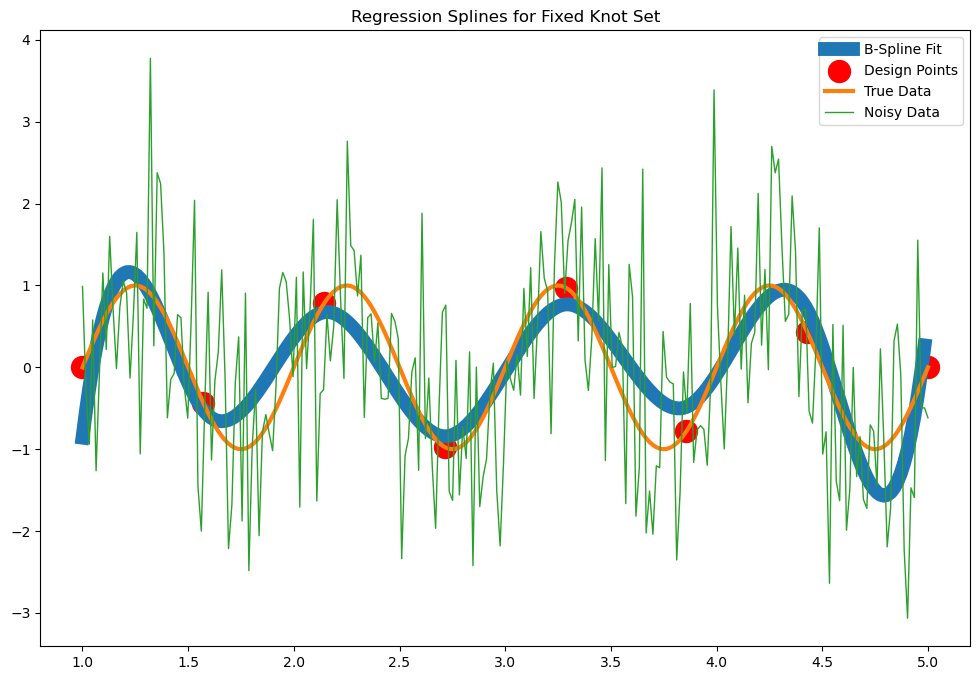

In [8]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

ax.set_title('Regression Splines for Fixed Knot Set')

ax.plot(x[:-1],basis.B(x[:-1])@beta, label='B-Spline Fit',lw=10)
ax.scatter(gamma,np.sin(2*np.pi*gamma), label='Design Points',s=250,color='red')
ax.plot(x,y, label='True Data',lw=3)
ax.plot(x,noisy, label='Noisy Data',lw=1)

ax.legend()

### Regression Spline Estimator

In [9]:
spline=Regression_Spline_Estimator(x,noisy,gamma,order=3,lambda_=0.01)

In [10]:
estimate=spline.fit()

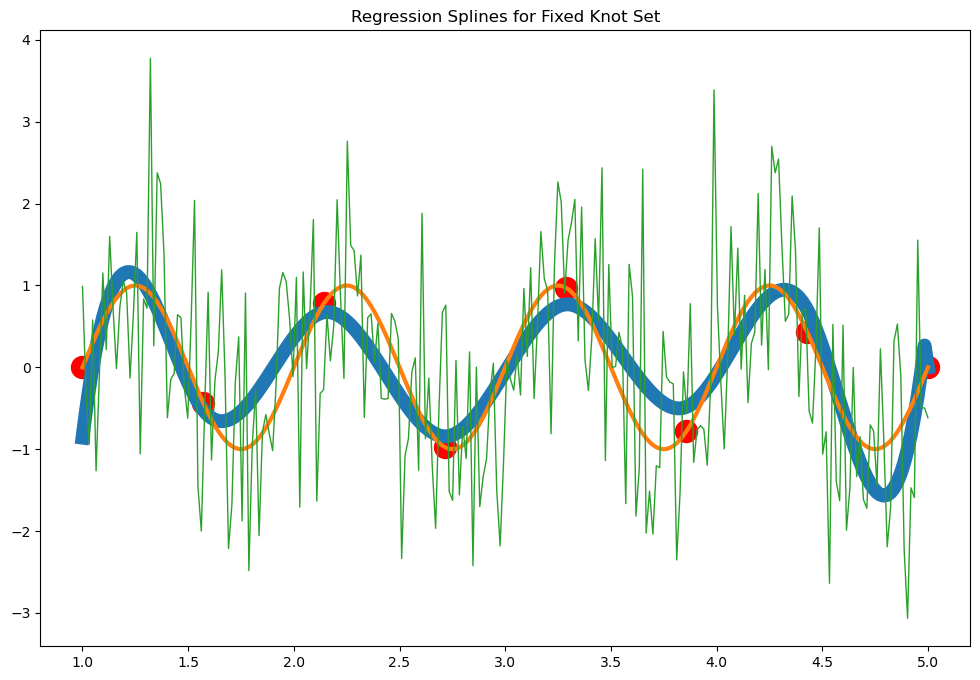

In [11]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

ax.set_title('Regression Splines for Fixed Knot Set')

ax.plot(x,estimate, label='B-Spline Fit',lw=10)
ax.scatter(gamma,np.sin(2*np.pi*gamma), label='Design Points',s=250,color='red')
ax.plot(x,y, label='True Data',lw=3)
ax.plot(x,noisy, label='Noisy Data',lw=1)


### Arbitrary Prediction

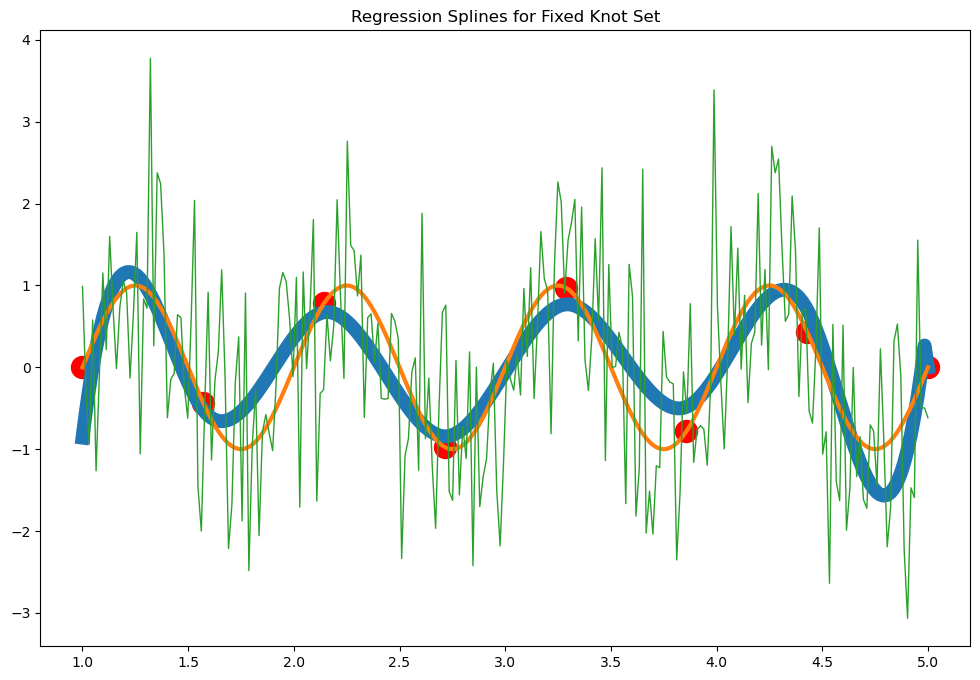

In [12]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

ax.set_title('Regression Splines for Fixed Knot Set')

ax.plot(x,spline.predict(x), label='B-Spline Fit',lw=10)
ax.scatter(gamma,np.sin(2*np.pi*gamma), label='Design Points',s=250,color='red')
ax.plot(x,y, label='True Data',lw=3)
ax.plot(x,noisy, label='Noisy Data',lw=1)


In [13]:
spline.predict(x)

array([[-0.85872678],
       [-0.53925668],
       [-0.25170155],
       [ 0.00518814],
       [ 0.23266196],
       [ 0.43196944],
       [ 0.60436013],
       [ 0.75108359],
       [ 0.87338936],
       [ 0.972527  ],
       [ 1.04974604],
       [ 1.10629603],
       [ 1.14342654],
       [ 1.1623871 ],
       [ 1.16442726],
       [ 1.15079657],
       [ 1.12274459],
       [ 1.08152085],
       [ 1.02837491],
       [ 0.96455632],
       [ 0.89131462],
       [ 0.80989936],
       [ 0.72156009],
       [ 0.62754637],
       [ 0.52910773],
       [ 0.42749373],
       [ 0.32395392],
       [ 0.21973784],
       [ 0.11609504],
       [ 0.01427508],
       [-0.08447251],
       [-0.17889817],
       [-0.26775235],
       [-0.3497855 ],
       [-0.42374808],
       [-0.48839054],
       [-0.5424868 ],
       [-0.58558627],
       [-0.61817292],
       [-0.64078639],
       [-0.65396627],
       [-0.65825221],
       [-0.65418381],
       [-0.6423007 ],
       [-0.6231425 ],
       [-0

In [14]:
spline.basis.B(x).shape

(250, 12)